# 09011381722112 
# Rizky Marliansyah

"Pengenalan Pola Sinyal Elektrokardiograf (EKG) dengan Jaringan Syaraf Tiruan Backpropagation untuk Diagnosa Kelainan Jantung Manusia"

# Step1: import Library

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.activations import sigmoid
from keras.activations import relu
from keras.activations import softmax
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

C:\Users\Windows 10\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Step2: mengatur Dataset

Dataset yang ditampilkan merupakan dataset penyakit jantung "Arrhythmia"

In [9]:
dataset1 = pd.read_csv("arrhythmia-ecg.csv")
dataset1

,Amplitude,RR,Speed,Age,Sex,Medicine,Arrhythmia
0,0.931352,0.813889,1.144323,69,M,Yes,(N
1,0.926876,0.813889,1.138824,69,M,Yes,(N
2,0.874316,0.813889,1.074244,69,M,Yes,(N
3,0.799794,0.788889,1.013823,69,M,Yes,(N
4,0.751938,0.788889,0.953161,69,M,Yes,(N
5,0.811479,0.788889,1.028636,69,M,Yes,(N
6,0.905821,0.816667,1.109169,69,M,Yes,(N
7,0.835362,0.652778,1.279703,69,M,Yes,(N
8,0.656436,0.991667,0.661952,69,M,Yes,(N
9,0.836695,0.841667,0.994093,69,M,Yes,(N


Dataset yang digunakan memiliki nilai-nilai yang berbeda yaitu bentuk "kategorical" yang terdiri dari huruf-huruf dan bentuk "numerik" yang terdiri dari angka-angka. Agar dapat mengidentifikasi nilai-nilai yang sama, maka bentuk kategorical tersebut akan diekstraksi menjadi bentuk numerik.

In [10]:
dataset2 = dataset1.apply(lambda col: pd.factorize(col, sort=True)[0])
dataset2

,Amplitude,RR,Speed,Age,Sex,Medicine,Arrhythmia
0,1339,252,1333,10,1,1,1
1,1313,252,1295,10,1,1,1
2,950,252,929,10,1,1,1
3,457,190,627,10,1,1,1
4,214,190,371,10,1,1,1
5,531,190,699,10,1,1,1
6,1177,260,1144,10,1,1,1
7,703,39,2113,10,1,1,1
8,48,563,83,10,1,1,1
9,708,317,531,10,1,1,1


Menentukan nilai pada input :
- Feature [:,0:6] => nilai feature diambil dari kolom dataset ke-0 sampai dengan kolom dataset ke-5 sebagai nilai input
- Label [:,6] => nilai label diambil dari kolom dataset ke-6 sebagai nilai output

In [11]:
feature = np.array(dataset2.ix[:,0:6])
label = np.array(dataset2.ix[:,6])

C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [12]:
scaler = MinMaxScaler() 
feature_scale = scaler.fit_transform(feature)

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Pembagian atau split data 

In [13]:
training_data, testing_data, training_label, testing_label = train_test_split(feature_scale, label, test_size=0.2, shuffle=True)
categorical_lab_train = np_utils.to_categorical(training_label)
categorical_lab_test = np_utils.to_categorical(testing_label)

# Step3: menentukan model Artificial Neural Network
Terdapat 3 buah layer yaitu :
- Satu Input Layer dengan 100 neuron dan input_dim 6
- Satu Hidden Layer dengan 50 neuron dan menggunakan fungsi aktivasi relu
- Satu Output Layer dengan 4 neuron sebagai output dan menggunakan fingsi aktivasi sigmoid

In [14]:
model = Sequential()
model.add(Dense(units= 100, input_dim = 6, activation=relu))
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.01), loss=categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 204       
Total params: 5,954
Trainable params: 5,954
Non-trainable params: 0
_________________________________________________________________


# Step4: Akurasi dan Prediksi

In [15]:
acc_training = model.fit(training_data, categorical_lab_train, validation_data=(testing_data, categorical_lab_test), epochs=100)
acc_test = model.evaluate(testing_data, categorical_lab_test)
prediksi_label_training = model.predict(training_data)
prediksi_label_testing = model.predict(testing_data)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2937 samples, validate on 735 samples
Epoch 1/100
2937/2937 [==============================] - 7s 2ms/step - loss: 1.1148 - accuracy: 0.9006 - val_loss: 0.8885 - val_accuracy: 0.9551
Epoch 2/100
2937/2937 [==============================] - 3s 928us/step - loss: 0.6221 - accuracy: 0.9615 - val_loss: 0.3843 - val_accuracy: 0.9551
Epoch 3/100
2937/2937 [==============================] - 6s 2ms/step - loss: 0.2678 - accuracy: 0.9615 - val_loss: 0.2319 - val_accuracy: 0.9551
Epoch 4/100
2937/2937 [==============================] - 4s 2ms/step - loss: 0.1983 - accuracy: 0.9615 - val_loss: 0.2112 - val_accuracy: 0.9551
Epoch 5/100
2937/2937 [==============================] - 6s 2ms/step - loss: 0.1862 - accuracy: 0.9615 - val_loss: 0.2056 - val_accuracy: 0.9551
Epoch 6/100
2937/2937 [==============================] - 5s 2ms/step - loss: 0.1821 - accuracy: 0.9615 - val_loss: 0.2026 - val_acc

2937/2937 [==============================] - 1s 439us/step - loss: 0.1037 - accuracy: 0.9677 - val_loss: 0.1003 - val_accuracy: 0.9619
Epoch 53/100
2937/2937 [==============================] - 1s 341us/step - loss: 0.1024 - accuracy: 0.9677 - val_loss: 0.0989 - val_accuracy: 0.9619
Epoch 54/100
2937/2937 [==============================] - 2s 569us/step - loss: 0.1012 - accuracy: 0.9680 - val_loss: 0.0975 - val_accuracy: 0.9619
Epoch 55/100
2937/2937 [==============================] - 2s 621us/step - loss: 0.1000 - accuracy: 0.9687 - val_loss: 0.0960 - val_accuracy: 0.9619
Epoch 56/100
2937/2937 [==============================] - 5s 2ms/step - loss: 0.0989 - accuracy: 0.9687 - val_loss: 0.0946 - val_accuracy: 0.9619
Epoch 57/100
2937/2937 [==============================] - 7s 2ms/step - loss: 0.0977 - accuracy: 0.9690 - val_loss: 0.0932 - val_accuracy: 0.9619
Epoch 58/100
2937/2937 [==============================] - 7s 2ms/step - loss: 0.0965 - accuracy: 0.9700 - val_loss: 0.0918 - val_

# Step5: Confusion Matrix

Istilah-istilah dalam confusion matrix:  
- TP (True Positive) => True Positive adalah ketika kelas aktual pada data point adalah 1 (True) dan prediksi juga 1 (True). Atau merupakan data positif yang terdeteksi benar.   
- TN (True Negative) => True Negative adalah ketika kelas actual pada data point 0 (False) dan prediksi juga 0 (negatif). Atau merupakan jumlah data  negatif yang terdeteksi dengan benar.  
- FP (False Positive) => False Positive adalah ketika kelas aktual pada data point 0 (False) dan prediksi 1 (True). False adalah karena model telah diprediksi salah dan positif karena kelas diprediksi yang positif (1). Atau merupakan data negatif yang terdeteksi dengan benar.
- FN (False Negative) => False Negative adalah ketika kelas pada data point 1 (True) dan prediksi 0 (False). False karena model telah diprediksi benar dan negatif karena kelas diprediksi yang negatif (0). Atau merupakan kebalikan dari true positif dimana data positif namun terdeteksi sebagai data negatif. 

In [16]:
label_categorical = to_categorical(label)
predict = model.predict(feature_scale)
predict

array([[0.00039178, 0.34306967, 0.00076875, 0.00314471],
       [0.00039771, 0.34385058, 0.00078306, 0.00317034],
       [0.00043541, 0.35971904, 0.00089633, 0.00332919],
       ...,
       [0.00238281, 0.16688627, 0.0024457 , 0.01416522],
       [0.00090781, 0.2625919 , 0.00126204, 0.00781724],
       [0.00112119, 0.34243712, 0.00191948, 0.00844753]], dtype=float32)

In [17]:
CM = confusion_matrix(label_categorical.argmax(axis=1), predict.argmax(axis=1))
TP, TN, FP, FN = CM
CM

array([[  52,    2,    0,    0],
       [   0, 3526,    0,    0],
       [  17,   11,   23,    0],
       [   4,   23,    0,   14]], dtype=int64)

In [18]:
TP

array([52,  2,  0,  0], dtype=int64)

In [19]:
TN

array([   0, 3526,    0,    0], dtype=int64)

In [20]:
FP

array([17, 11, 23,  0], dtype=int64)

In [21]:
FN

array([ 4, 23,  0, 14], dtype=int64)

# - Akurasi, Presisi, Sensitivity, dan Specificity

- Akurasi  
Akurasi dalam masalah klasifikasi merupakan prediksi jumlah benar dari kesuluruhan data. Nilai dari akurasi dapat menjelaskan seberapa akurat sistem dapat mengklasifikasikan data secara benar.
Dirumuskan dengan: (TP+TN)/(TP+FP+FN+TN)

In [22]:
akurasi = (TP+TN)/(TP+FP+FN+TN)*100
print(akurasi)

[71.23287671 99.04548007  0.          0.        ]


- Presisi  
Presisi merupakan tingkat dari ketepatan antara pengguna yang meminta informasi dengan jawaban yang diberikan oleh sistem. Presisi dalam sistem pengukuran dapat diartikan sebagai tingkatan dimana pengukuran berulang pada kondisi yang tidak berubah akan menghasilkan yang sama.
Dirumuskan dengan: TP/(TP+FP)

In [23]:
presisi = TP/(TP+FP)
print(presisi)

[0.75362319 0.15384615 0.                nan]


C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


- Sensitivity    
Sensitivity digunakan untuk mengukur proporsi positif yang sebenarnya dan diidentifikasi dengan benar.
Dirumuskan dengan: TP/(TP+FN)  

In [24]:
sensitivity = TP/(TP+FN)
print(sensitivity)

[0.92857143 0.08              nan 0.        ]


C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


- Specificity  
Specificity digunakan untuk mengukur proporsi negative yang sebenarnya dan diidentifikasi dengan benar.
Dirumuskan dengan: TN/(TN+FP)

In [25]:
specificity = TN/(TN+FP)
print(specificity)

[0.         0.99689002 0.                nan]


C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


# Step6: menampilkan Model

- Menampilkan model Akurasi

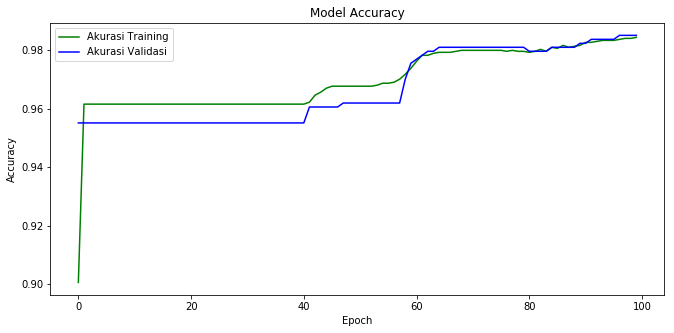

In [26]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(11,5))
ax0.plot(acc_training.history['accuracy'],'green', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()

- Menampilkan model Loss

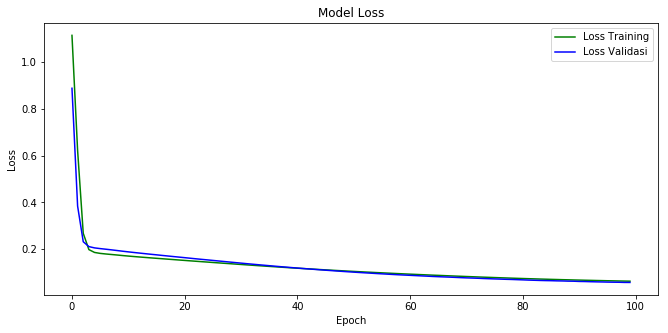

In [27]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(11,5))
ax1.plot(acc_training.history['loss'],'green', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

In [28]:
# menambahkan layer output kedalam model dengan activation softmax
model.add(Dense(2, activation='softmax'))